<a href="https://colab.research.google.com/github/gaurav3g/tf_models/blob/main/StockPredict2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving INFY_data.csv to INFY_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(style='seaborn')
%matplotlib inline

In [39]:
new_column_names = ['series', 'open', 'high', 'low', 'prev close', 'ltp', 'close', 'vwap', '52w h', '52w l', 'vol', 'value','no of trades'];
convert_dict = {
    'series': str,
    'open': float,
    'high': float,
    'low': float,
    'prev close': float,
    'ltp': float,
    'close': float,
    'vwap': float,
    '52w h': float,
    '52w l': float,
    'vol': int,
    'value': float,
    'no of trades': int,
}
  
bse = pd.read_csv('INFY_data.csv', index_col='Date ', usecols=['Date ', 'close ', 'VOLUME '])
bse.info()
bse.columns = ['close', 'vol']
bse[['close', 'vol']] = bse[['close', 'vol']].replace(',','', regex=True)
bse = bse.astype({
    'close': float,
    'vol': int,
})
bse.index = pd.to_datetime(bse.index)
bse = bse.sort_index()

<class 'pandas.core.frame.DataFrame'>
Index: 5982 entries, 07-May-2021 to 09-May-1997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   close    5982 non-null   object
 1   VOLUME   5982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.2+ KB


In [ ]:
# bse = bse[['close'],]
bse.describe()

,close,vol
count,5982.000000,5.982000e+03
mean,2693.881879,2.340822e+06
std,1913.872404,4.039966e+06
min,558.000000,6.000000e+02
25%,1308.625000,5.761642e+05
50%,2330.450000,1.058302e+06
75%,3235.000000,2.422535e+06
max,16875.250000,9.043339e+07


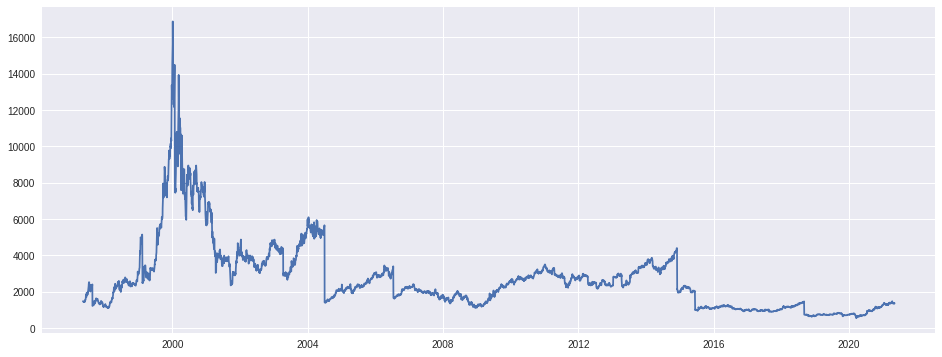

In [ ]:
plt.figure(1, figsize=(16, 6))
_ = plt.plot(bse.close)

In [46]:
bse['returns'] = bse.close.pct_change()
bse['log_returns'] = np.log( 1 + bse.returns)
# bse['is_expiry'] = (bse.index.dayofweek >= 3).astype(int)
bse.head(10)

,close,vol,returns,log_returns
Date,,,,
1997-05-09,1466.00,14500,NaN,NaN
1997-05-12,1445.50,11200,-0.013984,-0.014082
1997-05-13,1453.05,5300,0.005223,0.005210
1997-05-14,1450.35,7700,-0.001858,-0.001860
1997-05-15,1439.35,3600,-0.007584,-0.007613
1997-05-16,1438.05,5400,-0.000903,-0.000904
1997-05-19,1448.05,6500,0.006954,0.006930
1997-05-20,1448.00,4200,-0.000035,-0.000035
1997-05-21,1441.60,5100,-0.004420,-0.004430


In [47]:
bse.dropna(inplace=True)
X = bse[['close', 'vol', 'log_returns']].values
X

array([[ 1.44550000e+03,  1.12000000e+04, -1.40823210e-02],
       [ 1.45305000e+03,  5.30000000e+03,  5.20951308e-03],
       [ 1.45035000e+03,  7.70000000e+03, -1.85988894e-03],
       ...,
       [ 1.34150000e+03,  3.93978800e+06,  9.06067826e-03],
       [ 1.36160000e+03,  4.81009000e+06,  1.48720880e-02],
       [ 1.35255000e+03,  4.99143500e+06, -6.66877921e-03]])

In [48]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0, 1)).fit(X)
x_scaled = scalar.transform(X)
# print(x_scaled[:5])
y = [x[0] for x in x_scaled]
y[:5]

[0.056281748619824906,
 0.05674410344500273,
 0.056578758010833174,
 0.05590512846421648,
 0.05582551769961633]

Train test split

In [49]:
n=3
split = int(np.ceil(len(x_scaled) * 0.85))

x_train = x_scaled[:split]
x_test = x_scaled[split-n:]
y_train = y[:split]
y_test = y[split-n:]


In [ ]:
assert len(x_train) == len(y_train)
assert len(x_test) == len(y_test)

Labelling

In [50]:
Xtrain = [] 
Ytrain = [] 
Xtest = [] 
Ytest = []

for i in range(n, len(x_train)):
  Xtrain.append(x_train[i-n : i, : x_train.shape[1]])
  Ytrain.append(y_train[i]) # predict next record

for i in range(n, len(x_test)):
  Xtest.append(x_test[i-n : i, : x_test.shape[1]])
  Ytest.append(y_test[i]) # predict next record

In [ ]:
bse.head()

,close,vol,returns,log_returns,is_expiry
Date,,,,,
1997-05-12,1465.0,11200,-0.009466,-0.009511,0
1997-05-13,1455.6,5300,-0.006416,-0.006437,0
1997-05-14,1452.0,7700,-0.002473,-0.002476,0
1997-05-15,1450.5,3600,-0.001033,-0.001034,1
1997-05-16,1442.0,5400,-0.005860,-0.005877,1


In [51]:
print(Xtrain[0])
print(Ytrain[0])

[[5.62817486e-02 1.17214117e-04 8.88766194e-01]
 [5.67441034e-02 5.19722973e-05 9.01445284e-01]
 [5.65787580e-02 7.85113427e-05 8.96799091e-01]]
0.05590512846421648


In [57]:
val = np.array(Ytrain[0])
val = np.c_[val, np.zeros(val.shape), np.zeros(val.shape)]
scalar.inverse_transform(val)

array([[ 1.43935000e+03,  6.00000000e+02, -1.36638206e+00]])

In [58]:
Xtrain, Ytrain = (np.array(Xtrain), np.array(Ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, Ytest = (np.array(Xtest), np.array(Ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))
# Xtrain[0]

LSTM MODEL

In [54]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (Xtrain.shape[1], Xtrain.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

try:
  model.load_weights('/content/saved_weights/')
except:
  print('Unable to load weights')

model.fit(
    Xtrain, Ytrain, epochs=100, batch_size=16, verbose=2
)
model.save_weights('/content/saved_weights/')

Epoch 1/100
318/318 - 5s - loss: 2.9424e-04 - accuracy: 1.9681e-04
Epoch 2/100
318/318 - 2s - loss: 2.5804e-04 - accuracy: 1.9681e-04
Epoch 3/100
318/318 - 2s - loss: 2.3869e-04 - accuracy: 1.9681e-04
Epoch 4/100
318/318 - 2s - loss: 2.2789e-04 - accuracy: 1.9681e-04
Epoch 5/100
318/318 - 2s - loss: 2.3375e-04 - accuracy: 1.9681e-04
Epoch 6/100
318/318 - 2s - loss: 2.2538e-04 - accuracy: 1.9681e-04
Epoch 7/100
318/318 - 2s - loss: 2.0172e-04 - accuracy: 1.9681e-04
Epoch 8/100
318/318 - 2s - loss: 1.9333e-04 - accuracy: 1.9681e-04
Epoch 9/100
318/318 - 2s - loss: 2.0573e-04 - accuracy: 1.9681e-04
Epoch 10/100
318/318 - 2s - loss: 1.8612e-04 - accuracy: 1.9681e-04
Epoch 11/100
318/318 - 2s - loss: 1.9205e-04 - accuracy: 1.9681e-04
Epoch 12/100
318/318 - 2s - loss: 1.6848e-04 - accuracy: 1.9681e-04
Epoch 13/100


In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 128)            67584     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1625      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 118,643
Trainable params: 118,643
Non-trainable params: 0
_________________________________________________________________


In [61]:
trainPred = model.predict(Xtrain)
testPred = model.predict(Xtest)

In [62]:
trainPred = np.c_[trainPred, np.zeros(trainPred.shape), np.zeros(trainPred.shape)]
testPred = np.c_[testPred, np.zeros(testPred.shape), np.zeros(testPred.shape)]
print(trainPred.shape)

(5081, 3)


In [63]:
trainPred = scalar.inverse_transform(trainPred)
trainPred = [x[0] for x in trainPred]

testPred = scalar.inverse_transform(testPred)
testPred = [x[0] for x in testPred]

# print(trainPred)
# print(testPred)

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPred, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPred, squared=False)
print("Train Score: %.2f RMSE" % (testScore))

Train Score: 3492.99 RMSE
Train Score: 993.11 RMSE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


              close  predictions
Date                            
2021-03-31  1368.05  1411.916397
2021-04-01  1385.20  1386.907048
2021-04-05  1409.90  1424.369547
2021-04-06  1411.05  1433.065047
2021-04-07  1430.20  1439.272217
2021-04-08  1439.85  1464.105701
2021-04-09  1441.05  1465.786731
2021-04-12  1425.75  1465.009056
2021-04-13  1397.15  1415.031844
2021-04-15  1360.75  1408.293551
2021-04-16  1353.75  1368.658013
2021-04-19  1362.55  1394.193619
2021-04-20  1351.35  1406.942291
2021-04-22  1351.10  1379.820126
2021-04-23  1333.80  1385.538572
2021-04-26  1343.55  1353.890025
2021-04-27  1348.50  1368.152256
2021-04-28  1356.00  1381.169622
2021-04-29  1356.35  1384.279655
2021-04-30  1354.35  1377.126610
2021-05-03  1352.05  1369.937430
2021-05-04  1329.40  1379.373012
2021-05-05  1341.50  1352.160937
2021-05-06  1361.60  1368.449237
2021-05-07  1352.55  1388.273090


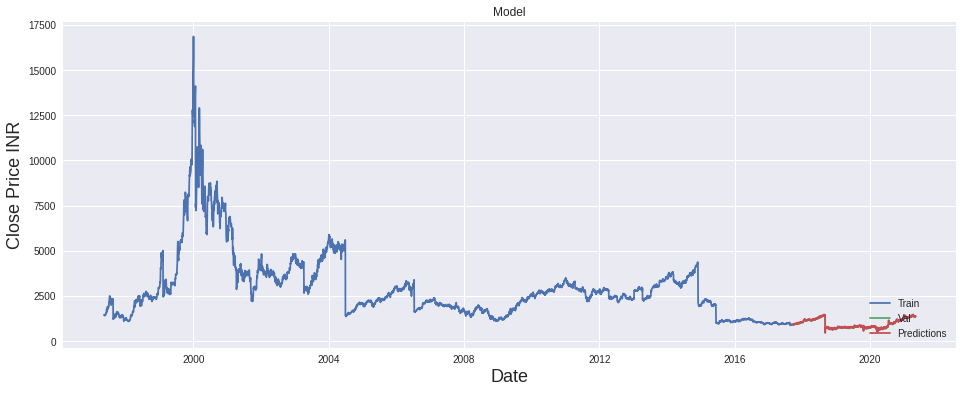

In [66]:
# Plot the data
data = bse.filter(['close'])
train = data[:split]
valid = data[split:]
valid['predictions'] = testPred
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
print(valid.tail(25))
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()